# application of diffusion map to the V-Dem dataset
different versions of the V-Dem dataset are also available at https://v-dem.net/data/the-v-dem-dataset/

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
from diffusion_maps_public import*

## loading data

In [3]:
#loading V-Dem data and using 24 indices for the diffusion map

path_VDEM = r'vdem.csv'
used_indices = ['v2x_suffr','v2psbars', 'v2psparban',
       'v2psoppaut', 'v2cldiscm', 'v2cldiscw', 'v2clacfree', 'v2cseeorgs',
       'v2csreprss', 'v2mecenefm', 'v2mecrit', 'v2merange', 'v2meharjrn',
       'v2meslfcen', 'v2mebias', 'v2elembaut', 'v2elembcap', 'v2elmulpar',
       'v2elrgstry', 'v2elvotbuy', 'v2elirreg', 'v2elintim', 'v2elpeace',
       'v2elfrfair']

data_df = pd.read_csv(path_VDEM,low_memory = False)
X = data_df.loc[:,used_indices]

## apply diffusion map

In [4]:
dmap = diffusion_map(np.array(X),data_df = data_df,epsilon = 10, N = 100, t = 1, standardize_data = True, num_eigenv = 3)
dmap.create_df_with_dmap() #creates dataframe including the diffusion components

Standardizing data
calculated distances in  2.1009745597839355  seconds.


Compute...: 100%|██████████████████████████████████████████████████████████████| 12296/12296 [00:09<00:00, 1340.93it/s]


initial guess for $epsilon$ 0.46561977467669713
calculated kernel matrix in  2.8298115730285645  seconds.
only keep nearest neighbours in  4.687610864639282 seconds.
calculated diffusion map in  3.595876693725586  seconds.


## plot results

In [5]:
dmap.df

country_name country_text_id  country_id  year  COWcode  v2x_polyarchy  \
0           Mexico             MEX           3  1917       70          0.147   
1           Mexico             MEX           3  1918       70          0.226   
2           Mexico             MEX           3  1919       70          0.224   
3           Mexico             MEX           3  1920       70          0.202   
4           Mexico             MEX           3  1921       70          0.194   
...            ...             ...         ...   ...      ...            ...   
12291     Zanzibar             ZZB         236  2017      511          0.259   
12292     Zanzibar             ZZB         236  2018      511          0.257   
12293     Zanzibar             ZZB         236  2019      511          0.254   
12294     Zanzibar             ZZB         236  2020      511          0.251   
12295     Zanzibar             ZZB         236  2021      511          0.263   

       v2x_suffr  v2x_elecoff  v2psbars  v2psparban  ...       pc2       pc3  \
0            0.5        0.000     0.336       0.241  ... -0.514704  1.623007   
1            0.5        1.000     0.336       0.241  ... -0.414800  1.574201   
2            0.5        1.000     0.336       0.241  ... -0.416494  1.574772   
3            0.5        1.000     0.229       0.241  ... -2.360010  0.760153   
4            0.5        1.000     0.229       0.241  ... -2.368021  0.754344   
...          ...          ...       ...         ...  ...       ...       ...   
12291        1.0        0.925     0.411       0.549  ... -1.827410 -0.871287   
12292        1.0        0.925     0.465       0.097  ... -1.822421 -0.905758   
12293        1.0        0.925     0.354       0.598  ... -1.807536 -0.873167   
12294        1.0        0.925     0.354       0.671  ... -1.896358 -1.200794   
12295        1.0        0.925     0.354       0.671  ... -2.055341 -1.246416   

         pc1std    pc2std    pc3std   factor1   factor2   factor3       dc1  \
0     -0.264052 -0.106098  0.379349 -0.616440 -0.338287 -1.671112  0.896342   
1     -0.258984 -0.085505  0.367942 -0.618438 -0.287951 -1.588629  0.905617   
2     -0.259700 -0.085854  0.368075 -0.620096 -0.289591 -1.593343  0.905719   
3     -0.342597 -0.486480  0.177672 -0.672908 -1.511940 -0.928884  0.983153   
4     -0.340431 -0.488131  0.176315 -0.668214 -1.515749 -0.918688  0.980565   
...         ...       ...       ...       ...       ...       ...       ...   
12291 -0.239185 -0.376693 -0.203648 -0.436577 -1.413666  0.030664  0.721731   
12292 -0.241851 -0.375664 -0.211705 -0.446022 -1.442491  0.089178  0.737067   
12293 -0.250165 -0.372596 -0.204087 -0.469278 -1.433765  0.034169  0.746312   
12294 -0.267705 -0.390905 -0.280664 -0.536248 -1.501984  0.498727  0.742780   
12295 -0.220852 -0.423677 -0.291328 -0.396705 -1.510289  0.616843  0.692667   

            dc2  
0      0.771636  
1      0.774501  
2      0.769102  
3      0.498910  
4      0.496553  
...         ...  
12291  0.643495  
12292  0.622303  
12293  0.608252  
12294  0.613696  
12295  0.681025  

[12296 rows x 42 columns]

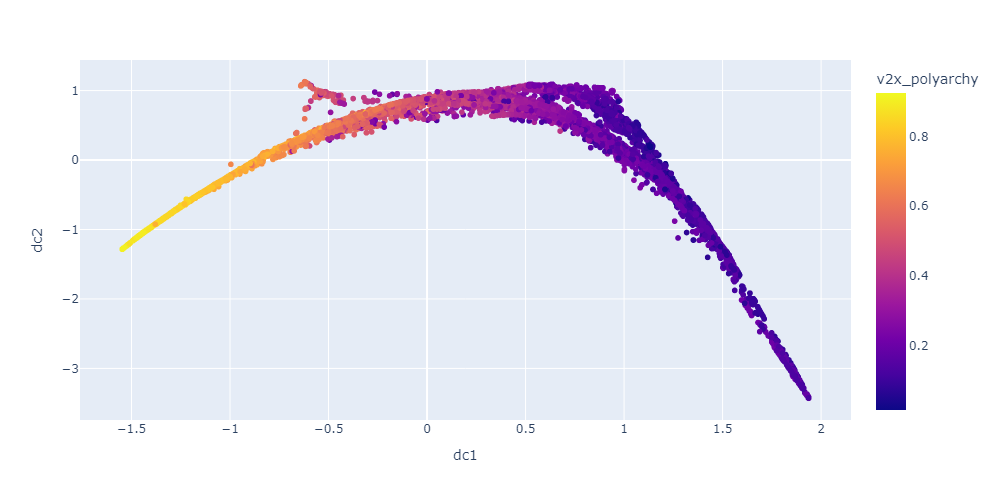

In [6]:
#plot diffusion map (diffusion component 1 and 2) of the V-Dem data
#colorcode indicates the EDI/polyarchy index
#country name and year are displayed when hovering over the plot.

fig = px.scatter(dmap.df, x='dc1', y='dc2',hover_data={"country_name","year"}, color = 'v2x_polyarchy')
fig.update_layout(height=500,width=900)
fig.show()